In [1]:
import findspark
findspark.init()

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import desc
from pyspark.sql.functions import asc
from pyspark.sql.functions import sum as Fsum

import datetime

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
spark = SparkSession \
    .builder \
    .appName("Wrangling Data") \
    .getOrCreate()

In [3]:
path = 'D:/arbol/caos/sparkify_log_small.json'
user_log = spark.read.json(path)

In [4]:
user_log.take(5)

[Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046'),
 Row(artist='Lily Allen', auth='Logged In', firstName='Elizabeth', gender='F', itemInSession=7, lastName='Chase', length=195.23873, level='free', location='Shreveport-Bossier City, LA', method='PUT', page='NextSong', registration=1512718541284, sessionId=5027, song='Cheryl Tweedy', status=200, ts=1513720878284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"', userId='1000'),
 Row(artist='Cobra Starship Featuring Leighton Meester', auth='Logged In', firstNa

In [5]:
user_log.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



In [7]:
user_log.describe().show()

+-------+-----------------+----------+---------+------+------------------+--------+------------------+-----+------------+------+-------+--------------------+------------------+--------+------------------+-------------------+--------------------+------------------+
|summary|           artist|      auth|firstName|gender|     itemInSession|lastName|            length|level|    location|method|   page|        registration|         sessionId|    song|            status|                 ts|           userAgent|            userId|
+-------+-----------------+----------+---------+------+------------------+--------+------------------+-----+------------+------+-------+--------------------+------------------+--------+------------------+-------------------+--------------------+------------------+
|  count|             8347|     10000|     9664|  9664|             10000|    9664|              8347|10000|        9664| 10000|  10000|                9664|             10000|    8347|             10000| 

In [6]:
user_log.describe("artist").show()

+-------+-----------------+
|summary|           artist|
+-------+-----------------+
|  count|             8347|
|   mean|            461.0|
| stddev|            300.0|
|    min|              !!!|
|    max|ÃÂlafur Arnalds|
+-------+-----------------+



In [9]:
user_log.describe(["artist","userId", "gender"]).show()

+-------+-----------------+------------------+------+
|summary|           artist|            userId|gender|
+-------+-----------------+------------------+------+
|  count|             8347|             10000|  9664|
|   mean|            461.0|1442.4413286423842|  null|
| stddev|            300.0| 829.8909432082618|  null|
|    min|              !!!|                  |     F|
|    max|ÃÂlafur Arnalds|               999|     M|
+-------+-----------------+------------------+------+



In [10]:
user_log.count()

10000

In [11]:
user_log.select("page").dropDuplicates().sort("page").show()

+----------------+
|            page|
+----------------+
|           About|
|       Downgrade|
|           Error|
|            Help|
|            Home|
|           Login|
|          Logout|
|        NextSong|
|   Save Settings|
|        Settings|
|Submit Downgrade|
|  Submit Upgrade|
|         Upgrade|
+----------------+



In [12]:
user_log.select(["userId", "firstname", "page", "song"]).where(user_log.userId == "1046").collect()

[Row(userId='1046', firstname='Kenneth', page='NextSong', song='Christmas Tears Will Fall'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Be Wary Of A Woman'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Public Enemy No.1'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Reign Of The Tyrants'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Father And Son'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='No. 5'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Seventeen'),
 Row(userId='1046', firstname='Kenneth', page='Home', song=None),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='War on war'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Killermont Street'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Black & Blue'),
 Row(userId='1046', firstname='Kenneth', page='Logout', song=None),
 Row(userId='1046', firstname='Kenneth'

In [13]:
get_hour = udf(lambda x: datetime.datetime.fromtimestamp(int(x) / 1000.0). hour)

In [14]:
user_log = user_log.withColumn("hour", get_hour(user_log.ts))

In [15]:
user_log.head()

Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046', hour='17')

In [16]:
songs_in_hour = user_log.filter(user_log.page == "NextSong").groupby(user_log.hour).count().orderBy(user_log.hour.cast("float"))

In [20]:
songs_in_hour.show(30)

+----+-----+
|hour|count|
+----+-----+
|   0|  276|
|   1|  348|
|   2|  358|
|   3|  375|
|   4|  249|
|   5|  216|
|   6|  228|
|   7|  251|
|   8|  339|
|   9|  462|
|  10|  479|
|  11|  484|
|  12|  430|
|  13|  362|
|  14|  295|
|  15|  257|
|  16|  248|
|  17|  369|
|  18|  375|
|  19|  456|
|  20|  454|
|  21|  382|
|  22|  302|
|  23|  352|
+----+-----+



In [18]:
songs_in_hour_pd = songs_in_hour.toPandas()
songs_in_hour_pd.hour = pd.to_numeric(songs_in_hour_pd.hour)

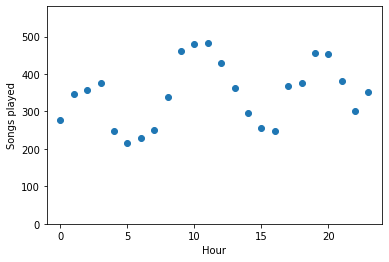

In [19]:
plt.scatter(songs_in_hour_pd["hour"], songs_in_hour_pd["count"])
plt.xlim(-1, 24);
plt.ylim(0, 1.2 * max(songs_in_hour_pd["count"]))
plt.xlabel("Hour")
plt.ylabel("Songs played");

In [21]:
user_log_valid = user_log.dropna(how = "any", subset = ["userId", "sessionId"])

In [22]:
user_log_valid.count()

10000

In [40]:
a = user_log.select("page").dropDuplicates().collect()

b = user_log.filter(user_log.userId == "").select("page").dropDuplicates().collect()



In [47]:
resultado = list(set(a) -  set(b))

resultado

[Row(page='Save Settings'),
 Row(page='Error'),
 Row(page='Settings'),
 Row(page='Submit Upgrade'),
 Row(page='Downgrade'),
 Row(page='Logout'),
 Row(page='NextSong'),
 Row(page='Upgrade'),
 Row(page='Submit Downgrade')]

In [49]:
b

[Row(page='Home'), Row(page='About'), Row(page='Login'), Row(page='Help')]

In [69]:
user_log.select(["userId", "page"]).dropDuplicates().sort("userId").show()

+------+--------+
|userId|    page|
+------+--------+
|      |    Help|
|      |   About|
|      |    Home|
|      |   Login|
|    10|NextSong|
|   100|    Home|
|   100|NextSong|
|  1000|NextSong|
|  1003|    Home|
|  1003|NextSong|
|  1005|NextSong|
|  1006|NextSong|
|  1017|    Home|
|  1017|NextSong|
|  1019|   Error|
|  1019|    Home|
|  1019|NextSong|
|  1019|  Logout|
|  1020|NextSong|
|  1020|    Home|
+------+--------+
only showing top 20 rows



In [164]:
x = user_log_valid.select("page").filter(user_log_valid["userId"] == "").dropDuplicates().collect()

y = user_log_valid.select("page").dropDuplicates().collect()

resultado = list( set(y) - set(x) )

resultado

[Row(page='Save Settings'),
 Row(page='Error'),
 Row(page='Settings'),
 Row(page='Submit Upgrade'),
 Row(page='Downgrade'),
 Row(page='Logout'),
 Row(page='NextSong'),
 Row(page='Upgrade'),
 Row(page='Submit Downgrade')]

In [157]:
x.show()

+-----+
| page|
+-----+
| Home|
|About|
|Login|
| Help|
+-----+



In [ ]:
user_log_valid = user_log_valid.filter(user_log_valid["userId"] != "")

In [ ]:
user_log_valid.count()

In [139]:
user_log.select("userId").dropDuplicates().filter(user_log.gender == "F").count()

462

In [97]:
# How many songs were played from the most played artist

ap = user_log_valid.select("artist").dropna(how = "any", subset = ["artist"]).groupby(user_log_valid.artist).count()

In [130]:

ap.sort(desc("count")).show(1)

+--------+-----+
|  artist|count|
+--------+-----+
|Coldplay|   83|
+--------+-----+
only showing top 1 row



In [169]:
# How many songs do users listen to on average between visiting our home page?
# Please round your answer to the closest integer.

from pyspark.sql.functions import mean
y = user_log_valid.filter(user_log.song != "").groupby(user_log.sessionId).count()
y.select(mean("count")).show()

+-----------------+
|       avg(count)|
+-----------------+
|6.830605564648118|
+-----------------+

